In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


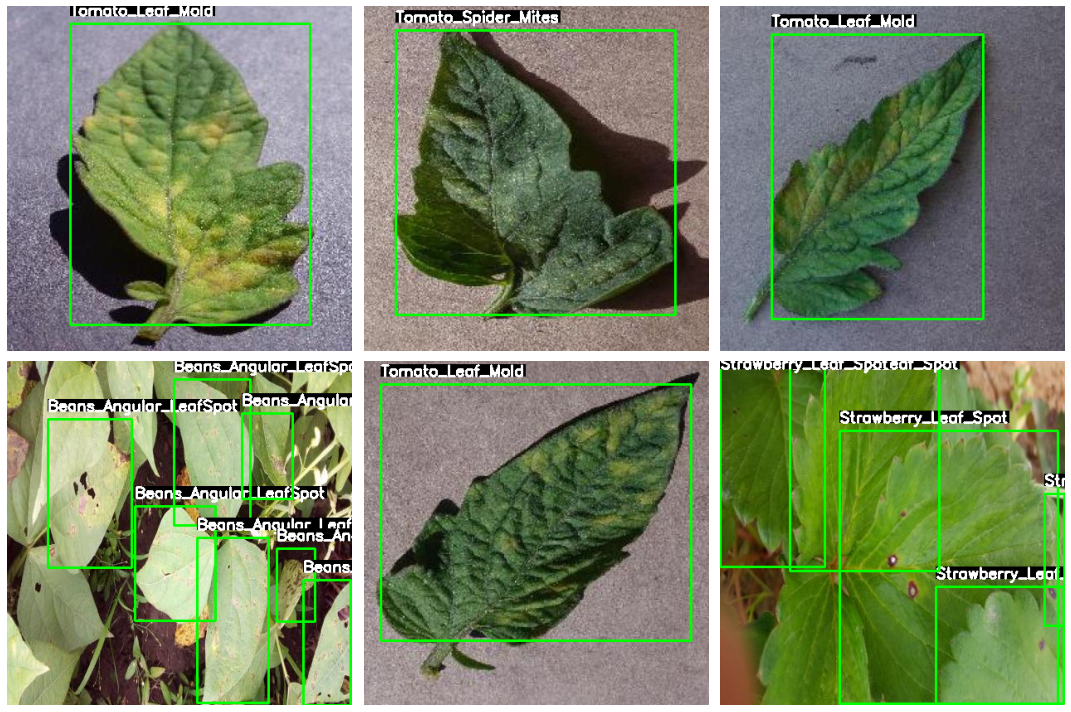

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolov9s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml', epochs=50, imgsz=416,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO9s', name='Small_try',
            batch=32, device=device, seed=69)

Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO9s, name=Small_try, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /home/user/CourseWork/Disease/train/labels... 2904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2904/2904 [00:02<00:00, 1172.64it/s]


train: New cache created: /home/user/CourseWork/Disease/train/labels.cache


val: Scanning /home/user/CourseWork/Disease/valid/labels... 1416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1416/1416 [00:00<00:00, 1779.45it/s]


val: New cache created: /home/user/CourseWork/Disease/valid/labels.cache
Plotting labels to YOLO9s/Small_try/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to YOLO9s/Small_try
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.43G      1.149      2.231      1.441         89        416: 100%|██████████| 91/91 [00:24<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]

                   all       1416       3193      0.338      0.339      0.273      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.35G      1.096      1.437      1.381         95        416: 100%|██████████| 91/91 [00:20<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]

                   all       1416       3193      0.603       0.57      0.593      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.41G      1.096      1.303      1.377        108        416: 100%|██████████| 91/91 [00:19<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.33it/s]

                   all       1416       3193      0.579      0.644       0.63      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.36G      1.075       1.27      1.367        118        416: 100%|██████████| 91/91 [00:19<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]

                   all       1416       3193      0.603      0.694      0.654      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.38G      1.051      1.184      1.353        123        416: 100%|██████████| 91/91 [00:19<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.31it/s]

                   all       1416       3193      0.683      0.673       0.73      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.39G      1.016      1.119      1.324         92        416: 100%|██████████| 91/91 [00:19<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.30it/s]

                   all       1416       3193      0.719      0.714      0.741      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.43G     0.9836      1.042      1.309         88        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]

                   all       1416       3193      0.729      0.729      0.775      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.41G     0.9718      1.004      1.296         94        416: 100%|██████████| 91/91 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]

                   all       1416       3193      0.796       0.74      0.795      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.38G     0.9457     0.9745       1.29        120        416: 100%|██████████| 91/91 [00:19<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]

                   all       1416       3193      0.717      0.751      0.774      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.35G     0.9274     0.9496      1.274         82        416: 100%|██████████| 91/91 [00:18<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]

                   all       1416       3193      0.779      0.755      0.788      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.42G     0.9181     0.9266      1.271         84        416: 100%|██████████| 91/91 [00:19<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.30it/s]

                   all       1416       3193      0.776      0.766      0.802      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.4G     0.9027     0.8956      1.248         95        416: 100%|██████████| 91/91 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]

                   all       1416       3193       0.74      0.773      0.793      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.42G     0.9029     0.8761      1.255         81        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]

                   all       1416       3193      0.811      0.785       0.83      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.39G     0.8845     0.8604      1.245         99        416: 100%|██████████| 91/91 [00:19<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]

                   all       1416       3193      0.831      0.781      0.845       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.42G     0.8776     0.8221      1.241        100        416: 100%|██████████| 91/91 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]

                   all       1416       3193      0.777      0.799      0.829       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.39G     0.8768      0.833       1.24         96        416: 100%|██████████| 91/91 [00:19<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.36it/s]

                   all       1416       3193      0.832      0.802      0.855      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.43G     0.8706     0.8144      1.233         79        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.27it/s]

                   all       1416       3193      0.808      0.801      0.832      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       4.4G      0.839     0.7753      1.214        112        416: 100%|██████████| 91/91 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]

                   all       1416       3193       0.85      0.818       0.86      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.43G     0.8283     0.7788      1.208        131        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]

                   all       1416       3193      0.842      0.802      0.859      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.4G     0.8424     0.7698      1.216        121        416: 100%|██████████| 91/91 [00:19<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.38it/s]

                   all       1416       3193      0.783      0.823      0.848      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.38G     0.8245     0.7633      1.206        113        416: 100%|██████████| 91/91 [00:19<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.31it/s]

                   all       1416       3193      0.853      0.802      0.865      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.35G     0.8171     0.7301      1.198        111        416: 100%|██████████| 91/91 [00:19<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.32it/s]

                   all       1416       3193      0.848      0.806      0.861      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.42G     0.8055     0.7338      1.201         98        416: 100%|██████████| 91/91 [00:19<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]

                   all       1416       3193       0.86      0.816       0.86      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.4G     0.8048     0.6971      1.188         92        416: 100%|██████████| 91/91 [00:19<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.34it/s]

                   all       1416       3193      0.837      0.812      0.862      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.42G     0.7966     0.7072      1.187        138        416: 100%|██████████| 91/91 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.46it/s]

                   all       1416       3193      0.851       0.82      0.865      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.4G     0.7772     0.6916      1.174        115        416: 100%|██████████| 91/91 [00:19<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.31it/s]

                   all       1416       3193      0.862      0.833      0.876      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.42G     0.7809     0.6662      1.171         97        416: 100%|██████████| 91/91 [00:19<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.35it/s]

                   all       1416       3193      0.863      0.824      0.878      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       4.4G     0.7745     0.6675      1.179         92        416: 100%|██████████| 91/91 [00:19<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.42it/s]

                   all       1416       3193      0.856       0.84      0.878      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.42G     0.7585     0.6398      1.164         83        416: 100%|██████████| 91/91 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.43it/s]

                   all       1416       3193      0.854      0.837      0.879      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.4G      0.755     0.6514      1.157        114        416: 100%|██████████| 91/91 [00:19<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.42it/s]

                   all       1416       3193      0.863      0.836      0.878      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.43G      0.758     0.6399      1.164         90        416: 100%|██████████| 91/91 [00:19<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]

                   all       1416       3193      0.874      0.838      0.884      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.39G     0.7554     0.6321      1.169        109        416: 100%|██████████| 91/91 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]

                   all       1416       3193       0.88      0.824       0.88      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.38G     0.7408     0.6116      1.152        102        416: 100%|██████████| 91/91 [00:19<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]

                   all       1416       3193      0.861      0.857       0.89      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.38G     0.7324     0.6108      1.148         86        416: 100%|██████████| 91/91 [00:19<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]

                   all       1416       3193      0.876      0.849      0.893      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.4G     0.7269     0.5897      1.141         89        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.41it/s]

                   all       1416       3193      0.889       0.85      0.898      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.35G      0.724     0.5839      1.139        107        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.42it/s]

                   all       1416       3193      0.888       0.86        0.9       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.4G     0.7299     0.5782       1.15         96        416: 100%|██████████| 91/91 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.42it/s]

                   all       1416       3193      0.886      0.861      0.901      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.38G     0.7073     0.5686      1.129         83        416: 100%|██████████| 91/91 [00:19<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.44it/s]

                   all       1416       3193      0.862      0.868      0.896      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.42G        0.7     0.5498      1.126        115        416: 100%|██████████| 91/91 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.41it/s]

                   all       1416       3193      0.879      0.844      0.893      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.4G     0.7007     0.5475      1.123        107        416: 100%|██████████| 91/91 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.43it/s]

                   all       1416       3193      0.893      0.849        0.9       0.73


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.4G     0.6046     0.4468       1.09         40        416: 100%|██████████| 91/91 [00:19<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.38it/s]

                   all       1416       3193      0.884      0.863        0.9      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.38G     0.5869     0.4209       1.08         53        416: 100%|██████████| 91/91 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]

                   all       1416       3193       0.88      0.878      0.901      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.42G      0.578     0.4092      1.064         53        416: 100%|██████████| 91/91 [00:19<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.39it/s]

                   all       1416       3193      0.891      0.864      0.899      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.39G     0.5625     0.3885      1.058         50        416: 100%|██████████| 91/91 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.37it/s]

                   all       1416       3193      0.888      0.876      0.905      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.4G     0.5618     0.3788      1.055         51        416: 100%|██████████| 91/91 [00:19<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.42it/s]

                   all       1416       3193      0.901       0.87      0.905      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.39G     0.5529     0.3715      1.056         56        416: 100%|██████████| 91/91 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all       1416       3193      0.896      0.876       0.91       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.42G     0.5453     0.3551      1.044         57        416: 100%|██████████| 91/91 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all       1416       3193      0.891      0.881      0.911      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.39G     0.5445     0.3571      1.042         46        416: 100%|██████████| 91/91 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.46it/s]

                   all       1416       3193      0.914      0.863      0.914      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.41G     0.5292     0.3467      1.035         52        416: 100%|██████████| 91/91 [00:19<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all       1416       3193      0.906      0.872      0.914      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.39G     0.5308     0.3394      1.039         51        416: 100%|██████████| 91/91 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:05<00:00,  4.45it/s]

                   all       1416       3193      0.907      0.869      0.914      0.761



50 epochs completed in 0.364 hours.
Optimizer stripped from YOLO9s/Small_try/weights/last.pt, 15.2MB
Optimizer stripped from YOLO9s/Small_try/weights/best.pt, 15.2MB

Validating YOLO9s/Small_try/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLOv9s summary (fused): 486 layers, 7,171,732 parameters, 0 gradients, 26.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]


                   all       1416       3193      0.906      0.869      0.914      0.761
Beans_Angular_LeafSpot         83        277      0.754      0.675       0.71      0.457
            Beans_Rust         97        463      0.816      0.819      0.887      0.644
Strawberry_Angular_LeafSpot        166        193      0.946      0.908      0.944       0.78
Strawberry_Anthracnose_Fruit_Rot         47         85      0.909        0.8      0.902       0.64
Strawberry_Blossom_Blight        104        161      0.923          1      0.993      0.892
  Strawberry_Gray_Mold        192        200      0.932       0.89      0.933      0.687
  Strawberry_Leaf_Spot        199        779      0.925      0.843      0.931      0.858
Strawberry_Powdery_Mildew_Fruit         77        151      0.859      0.728      0.839      0.677
Strawberry_Powdery_Mildew_Leaf        155        584      0.848      0.782      0.859      0.736
         Tomato_Blight        100        100      0.974       0.99      0.9

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f063e74bfa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:
df = pd.read_csv('YOLO9s/Small_try/results.csv')

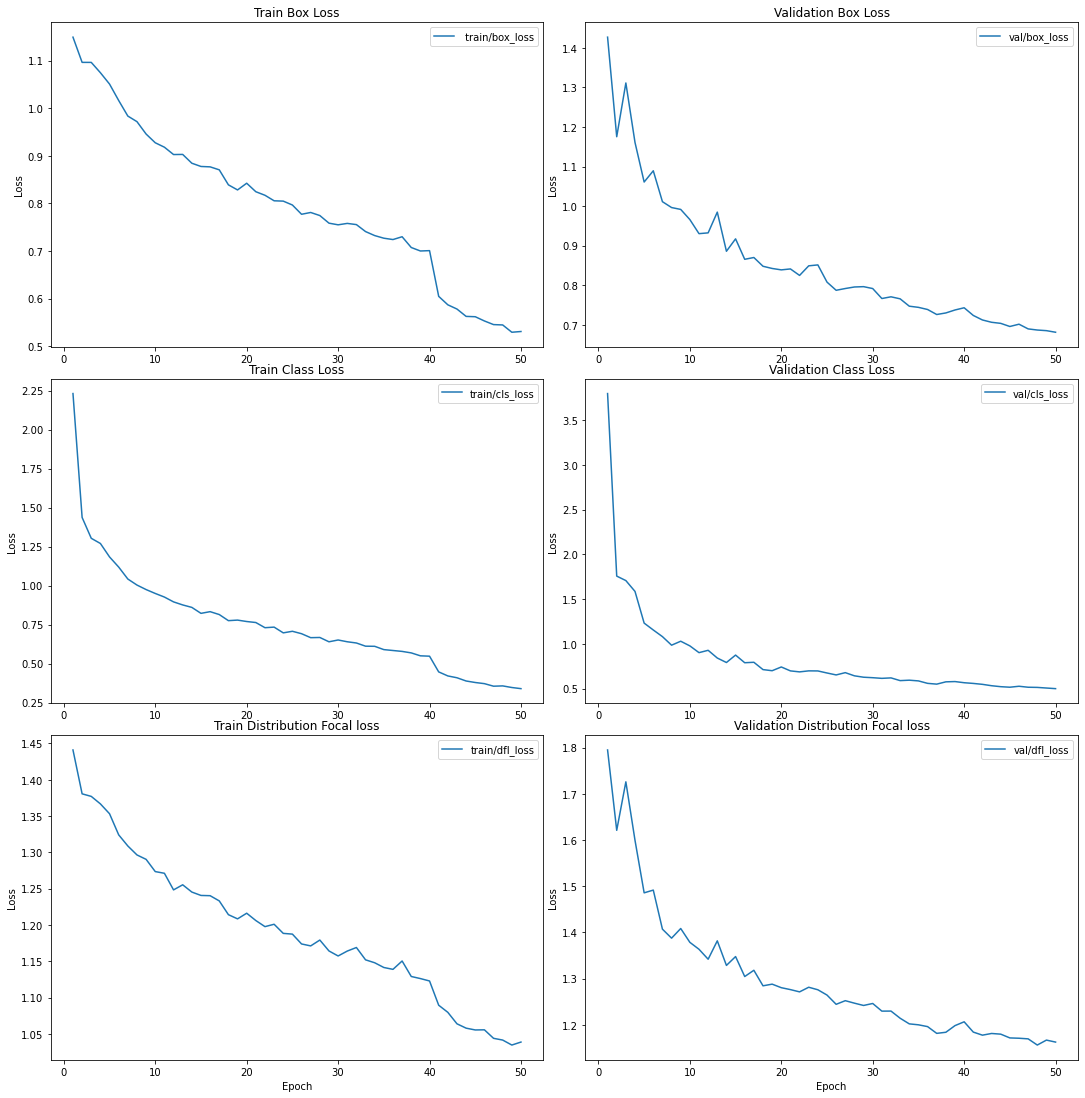

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

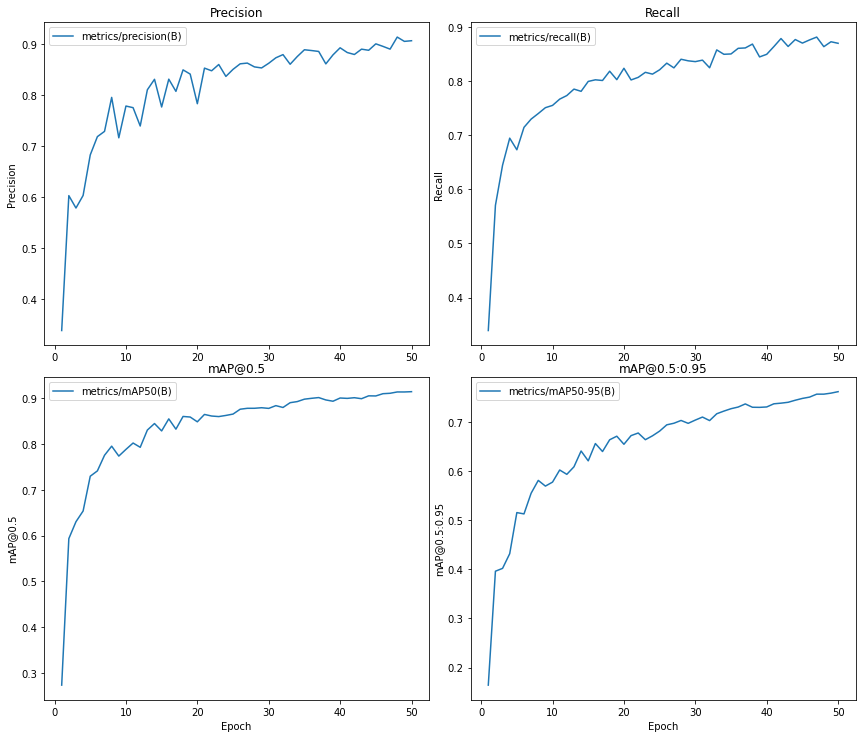

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

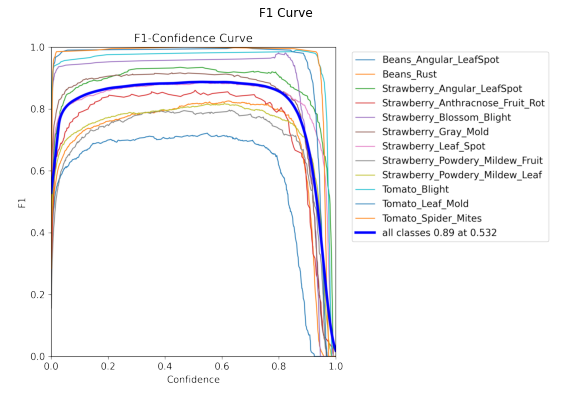

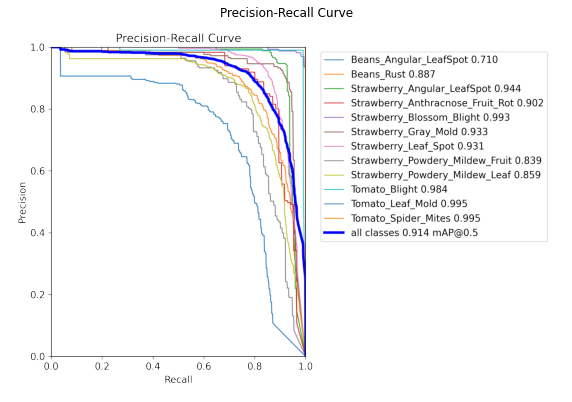

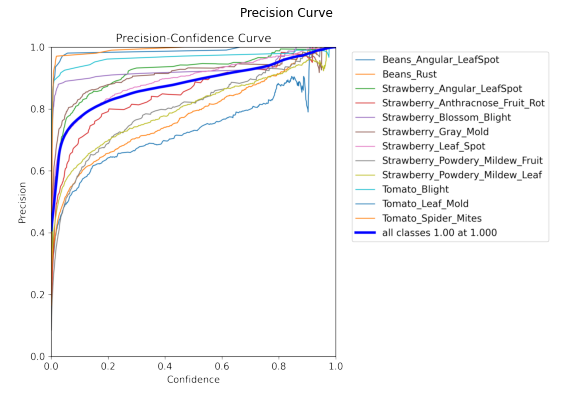

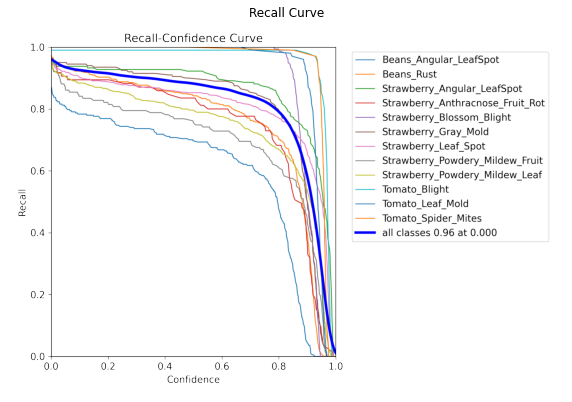

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO9s/Small_try/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO9s/Small_try/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO9s/Small_try/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO9s/Small_try/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

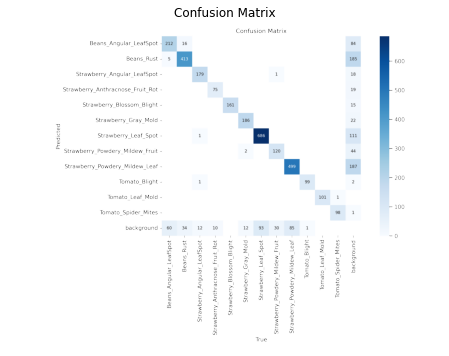

In [10]:
confusion_matrix = Image.open("YOLO9s/Small_try/confusion_matrix.png")
plt.figure(figsize=(12, 6))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/Disease/test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg: 416x416 4 Beans_Angular_LeafSpots, 25.2ms
Speed: 0.8ms preprocess, 25.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)


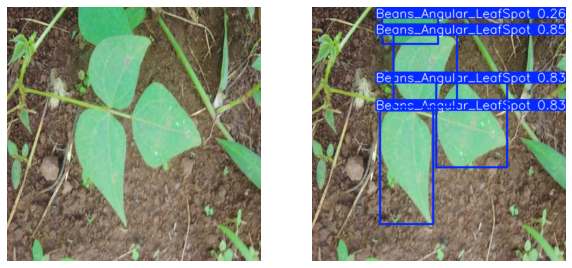

In [11]:
res = model('test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/1619349070358_jpg.rf.598983cd4477c6faf4dbb5dcd65f989a.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();